# Carta de Smith: significado, construcción y uso

### Parte 1. Paquete `lines.py` y representación del coeficiente de reflexión

Rev. 27/09/2022. Autor: A. Salinas.

Los cálculos en los problemas de líneas de transmisión suelen ser muy complejos. La carta de Smith es una herramienta para hacer estos cálculos de forma gráfica (Phillip H. Smith, "Transmission Line Calculator", *Electronics*, vol. 12, pp. 29-31, 1939).

La carta de Smith surge de la representación en el plano complejo del coeficiente de reflexión en la carga $\Gamma_L$. Puesto que $\Gamma_L$ es complejo y su módulo es siempre menor o igual que la unidad, la carta de Smith se sitúa en el interior del círculo unidad en el plano complejo, el eje de abcisas es el eje real y el eje de ordenadas el imaginario.

El coeficiente de reflexión en la carga es función de la impedancia de carga normalizada a la impedancia intrínseca de la línea, que descomponemos en su parte real $r$ e imaginaria $x$: $z_L=Z_L/Z_0=r+\jmath x$:
$$\Gamma_L=\frac{Z_L-Z_0}{Z_L+Z_0}=\frac{(Z_L/Z_0)-1}{(Z_L/Z_0)+1}=\frac{r+\jmath x-1}{r+\jmath x+1}$$

En lo que sigue vamos a tratar de comprender qué significa cada uno de los círculos que aparecen en la carta. Para ello usaremos las funciones del paquete `lines`.

In [ ]:
reset

In [3]:
from lines import *  # Cargamos el paquete

Dentro de `lines` se cargan los paquetes `numpy` y `matplotlib.pyplot` con los alias `np` y `plt`.

Nota: desde Jupyter se puede visualizar el paquete `lines.py` sin más que abrirlo desde la ventana general. Basta con clicar en el fichero en la listya de ficheros del directorio.

## El paquete `lines.py

### Constantes definidas

**Nota**: Estas definiciones están en el paquete `lines`. Al importarlo ya se han ejecutado. Se muestran por comodidad. 

In [7]:
# Dentro del paquete lines
pi=np.pi  
D2r=pi/180.
R2d=180./pi

* `pi` define el número $\pi$ desde el paquete de `numpy`
* `D2r` y `R2d` factores de conversión de grados a radianes y viceversa

Usaremos la función `print` de Python para generar las salidas de valores de variables. En su versión más simple, usa como argumentos las variables que se quieren mostrar, separadas por comas.

In [4]:
print(pi, pi*R2d, 180*D2r)

3.141592653589793 180.0 3.141592653589793


### Manejo de complejos

In [ ]:
# Dentro del paquete lines

# Funciones con complejos
def C2p(x):   
    """
    Complejo a tupla de polares.
    """
    return (np.abs(x),np.angle(x))

def C2pD(x):
    """
    Complejo a tupla de polares con fase en grados.
    """
    return (np.abs(x),np.angle(x)*R2d)

def P2c(r,th):
    """
    Modulo y fase a tupla de cartesianas.
    """
    return (r*np.cos(th),r*np.sin(th))

def P2cD(r,th): # Modulo y fase en grados a tupla de cartesianas
    """
    Modulo y fase en grados a tupla de cartesianas.
    """
    thr=th*D2r
    return P2c(r,thr)

In [15]:
C2p(1.+1.j)

(1.4142135623730951, 0.7853981633974483)

In [16]:
C2pD(1.+1.j)

(1.4142135623730951, 45.0)

In [17]:
P2c(1.4142135623730951, 0.7853981633974483)

(1.0000000000000002, 1.0)

In [18]:
P2cD(1.4142135623730951, 45.0)

(1.0000000000000002, 1.0)

Observar que la salida de estas funciones es una tupla, es decir, un par de números. 

### Funciones de dibujo

In [ ]:
# Dentro del paquete lines

## Funciones generales de dibujo
def Point(x,y,c='k',marker='o',s=1): # Dibuja un punto en las coordenadas cartesianas x, y
    """
    Dibuja un punto con coordenadas x,y.
    (x,y,c='k',marker='o',s=1)
    """
    plt.scatter(x,y,c=c,marker=marker,s=20*2**s)

def Arc(r,thi,thf,c='k',ls='-',lw=1): #Dibuja un arco de radio r desde thi rad hasta thf rad
    """
    Dibuja un archo de radio r desde thi rad hasta thf rad
    (r,thi,thf,c='k',ls='-',lw=1)
    """
    thes=np.linspace(thi,thf,100) # Lista de angulos 
    xsar=r*np.cos(thes)  # Proyeccion al eje x
    ysar=r*np.sin(thes)  # Proyeccion al eje y
    # Punto inicial de la flecha: desde el valor -3, dx, dy
    flecha=(xsar[-3],ysar[-3],xsar[-1]-xsar[-3],ysar[-1]-ysar[-3])
    plt.plot(xsar,ysar,c=c,ls=ls,lw=lw)
    # Se dibuja la flecha con los valores normales
    plt.arrow(*flecha,head_width=0.05, head_length=0.1,fc=c,ec=c,\
            length_includes_head=True)    

def Circle(r,c='k',ls='-',lw=1):
    """
    Dibuja un circulo de radio r
    (r,c='k',ls='-',lw=1)
    """
    thes=np.linspace(0,2.*np.pi,300)
    xsar=r*np.cos(thes)
    ysar=r*np.sin(thes)
    plt.plot(xsar,ysar,c=c,ls=ls,lw=lw)

def Line(px1,py1,px2,py2,c='k',ls='-',lw=1):
    """
    Dibuja una linea desde (px1,py1) hasta (px2,py2)
    (px1,py1,px2,py2,c='k',ls='-',lw=1)
    """
    plt.plot([px1,px2],[py1,py2],c=c,ls=ls,lw=lw)

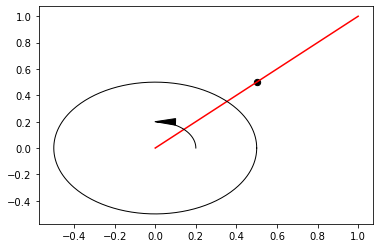

In [26]:
Line(0,0,1,1,c='r',ls='-',lw=1.5)
Circle(0.5)
Arc(0.2,0,pi/2)
Point(0.5,0.5)

# Coeficiente de reflexión

Podemos calcular el coeficiente de reflexión con la función `Gr`, definida dentro del paquete `lines`:

In [ ]:
# Dentro del paquete lines

# Funciones de las lineas
def Gr(zln):
    """
    Coeficiente de reflexion en la carga.
    Impedancia de carga normalizada. 
    """
    return (zln-1)/(zln+1)

Comprobamos cómo funciona. Tengamos, por ejemplo, $Z_0=75$ $\Omega$ y $Z_L=25+50 \jmath$ $\Omega$.

In [28]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from lines import *

In [30]:
zl=25.+50.j  # Load impedance 
z0=75.          # Line impedance
zln=zl/z0       # Nomalized load
ga=Gr(zln)     # Reflection coefficient from Gr function
print('Gamma={0:9.2E}'.format(ga))   # Cartesian form
print('Gamma (mod., phas. (deg))={0:9.2E},{1:5.1F}'.format(*C2pD(ga)))

Gamma=-2.00E-01+6.00E-01j
Gamma (mod., phas. (deg))= 6.32E-01,108.4


In [31]:
ga_nomefio=(zl-z0)/(zl+z0)
print('Gamma comprobado={0:9.2E}'.format(ga_nomefio))   # Cartesian form

Gamma comprobado=-2.00E-01+6.00E-01j


## Representación de $\Gamma_L$ en el plano complejo

Vamos a usar el siguiente código como punto de partida.  
Seguimos con el ejemplo anterior.

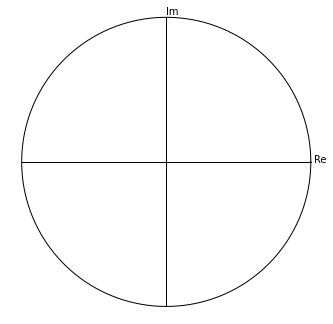

In [7]:
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
plt.axis('equal')  # Squared figure
plt.axis('off')    # whithout axis
Line(-1,0,1,0)     # See lines_man notebook
Line(0,-1,0,1)
Circle(1)          # See lines_man notebook
plt.text(1.02,0,'Re')
plt.text(0,1.02,'Im')
plt.show()

Para hacer la representación gráfica usamos el objeto `.figure` y le damos un tamaño (en pulgadas). A continuación se le van añadiendo al dibujo diferentes componentes.
En primer lugar hacemos el dibujo proporcional, `plt.axis('equal')`, de manera que un circulo no aparezca como una elipse (véase `lines_man`). Luego se eliminan los ejes: `plt.axis('off')`.
Finalizados los detalles de apariencia del dibujo, añadimos una recta que representa el eje real y otra que representa el eje imaginario sin más que darle las coordenadas correspondientes de los puntos inicial y final: (-1,0), (1,0) para el eje real y (0,-1), (0,1) para el eje imaginario. El circulo unidad se hace con la función `Circle` definida, al igual que la función `Line`, en el paquete `lines.py`.

El texto se le incorpora a la gráfica con la función `.text`. 

Finalmente se muestra el gráfico con el método `.show()`.

En las siguientes sentencias se guardan los valores de las impedancias de carga y de la línea en sendas variables y se calcula el valor de la impedancia de carga normalizada.

Calculamos el coeficiente de reflexión en la carga y lo escribimos como número complejo, módulo y fase (en grados), usando la función `Gr` de `lines`.

Usamos también la función `C2pdD` que transforma un número complejo, expresado en forma cartesiana, en módulo y fase (véase el notebook `Python_basic`).

**Nota:** Las funciones que se definen en el paquete `lines` empiezan siempre con mayúsculas.

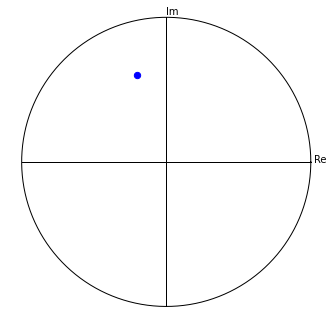

In [32]:
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
plt.axis('equal')  # Squared figure
plt.axis('off')    # whithout axis
Line(-1,0,1,0)     # See lines_man notebook
Line(0,-1,0,1)
Circle(1)          # See lines_man notebook
Point(ga.real,ga.imag,c='b')
plt.text(1.02,0,'Re')
plt.text(0,1.02,'Im')
plt.show()

El punto que representa el valor de $\Gamma_L$ se hace con la función `Point` de `line` cuyos argumentos son las coordenadas $x$ e $y$, del punto a representar. Por eso se descompone $\Gamma_L$ en sus partes real e imaginaria con los atributos `.real` y `.imag`.

Tareas a realizar:
1. Dibujar el círculo de $\Gamma$, es decir un círculo centrado en el origen y de radio $|\Gamma_L|$
2. Dibujar una línea que represente su módulo y vaya del origen al punto $\Gamma_L$
3. Dibujar el arco que represente la fase de $\Gamma_L$. Considerar como radio la mitad del módulo.
4. Dibujar en una misma figura los $\Gamma_L$ correspondientes a las siguientes cargas normalizadas:
    1. (r=1, x=0), (r=1, x=1), (r=1, x=-1), (r=1, x=2), (r=1, x=-2), (r=1, x=10), (r=1, x=-10)
    2. (r=0, x=1), (r=1, x=1), (r=2, x=1), (r=3, x=1), (r=4, x=1), (r=10, x=1), (r=20, x=1)
    3. Representar en una misma figura todos los puntos anteriores, unos de color azul y otros de color rojo.

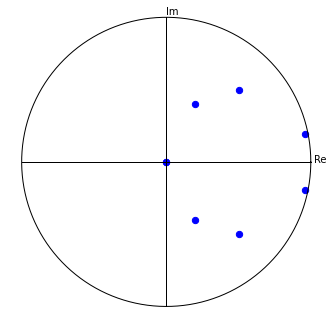

In [3]:
xnsp=np.array([0,1,2,10])
xnsn=xnsp*-1
znsp=1+1.j*xnsp
znsn=1+1.j*xnsn
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
plt.axis('equal')  # Squared figure
plt.axis('off')    # whithout axis
Line(-1,0,1,0)     # See lines_man notebook
Line(0,-1,0,1)
Circle(1)          # See lines_man notebook
for i in znsp:
    ga=Gr(i)
    Point(ga.real,ga.imag,c='b')
for i in znsn:
    ga=Gr(i)
    Point(ga.real,ga.imag,c='b')
plt.text(1.02,0,'Re')
plt.text(0,1.02,'Im')
plt.show()

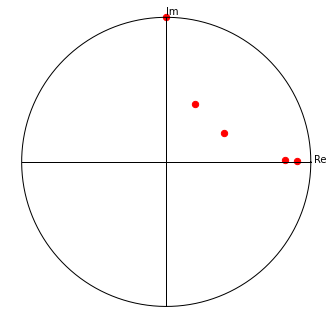

In [4]:
xns=np.array([0,1,2,10,20])
zns=xns+1.j
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
plt.axis('equal')  # Squared figure
plt.axis('off')    # whithout axis
Line(-1,0,1,0)     # See lines_man notebook
Line(0,-1,0,1)
Circle(1)          # See lines_man notebook
for i in zns:
    ga=Gr(i)
    Point(ga.real,ga.imag,c='r')
plt.text(1.02,0,'Re')
plt.text(0,1.02,'Im')
plt.show()